In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
results_dir = "coloring"

In [3]:
data_filename = "graph_7__0__10000__False__0.8__0.60"

In [4]:
df = pd.read_csv(f"results/{results_dir}/{data_filename}.csv")

In [5]:
plt.ioff()
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

In [6]:
df = df.set_index('Node')
df

,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100
Node,,,,,,,,,,,,,,,
0,2340,1459,993,747,2064,1619,522,173,59,22,2,0,0,0,NaN
1,1227,1003,828,746,2610,2416,774,276,86,24,6,3,0,0,NaN
2,1241,1004,834,755,2596,2312,854,295,85,14,7,3,0,0,NaN
3,1205,989,883,765,2597,2365,793,284,79,30,6,1,2,1,NaN
4,1622,1041,826,692,2334,2311,763,248,109,38,8,5,1,2,NaN
5,2093,1477,1054,735,2326,1676,439,150,37,11,1,1,0,0,NaN
6,1110,960,855,778,2682,2439,804,239,91,27,11,3,1,0,NaN
7,1118,981,857,700,2691,2445,818,270,85,23,7,5,0,0,NaN
8,1164,925,840,735,2699,2439,830,263,68,23,10,3,0,1,NaN


In [7]:
df = df.loc[[0, 4, 5, 9]]
df

,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100
Node,,,,,,,,,,,,,,,
0,2340,1459,993,747,2064,1619,522,173,59,22,2,0,0,0,NaN
4,1622,1041,826,692,2334,2311,763,248,109,38,8,5,1,2,NaN
5,2093,1477,1054,735,2326,1676,439,150,37,11,1,1,0,0,NaN
9,1102,974,868,720,2715,2404,804,285,91,31,5,0,0,1,NaN


In [8]:
dft = df.transpose()
# dft.drop(['Node'], inplace=True)
df.index.names = ['count']
dft = dft.add_prefix("Node_")
dft

count,Node_0,Node_4,Node_5,Node_9
1,2340.0,1622.0,2093.0,1102.0
2,1459.0,1041.0,1477.0,974.0
3,993.0,826.0,1054.0,868.0
4,747.0,692.0,735.0,720.0
5,2064.0,2334.0,2326.0,2715.0
10,1619.0,2311.0,1676.0,2404.0
20,522.0,763.0,439.0,804.0
30,173.0,248.0,150.0,285.0
40,59.0,109.0,37.0,91.0
50,22.0,38.0,11.0,31.0


In [9]:
plt.ioff()
ax = sns.lineplot(dft, linewidth=2, markersize=10)

/home/agaru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/agaru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [10]:
markers = ('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

In [11]:
for i, line in enumerate(ax.lines):
    line.set_marker(markers[i % len(df.index)])

In [12]:
def filename_parser(filename):
    graph_name, central_dist, no_sim, me, fault_prob, highest_fault_prob = filename.split("__")
    return f"Program: {results_dir} | Graph: {graph_name} | {'Distributed' if central_dist=='1' else 'Central'} | N: {no_sim} | ME: {me} | FP: {fault_prob} | Highest FP at any Node : {highest_fault_prob}"

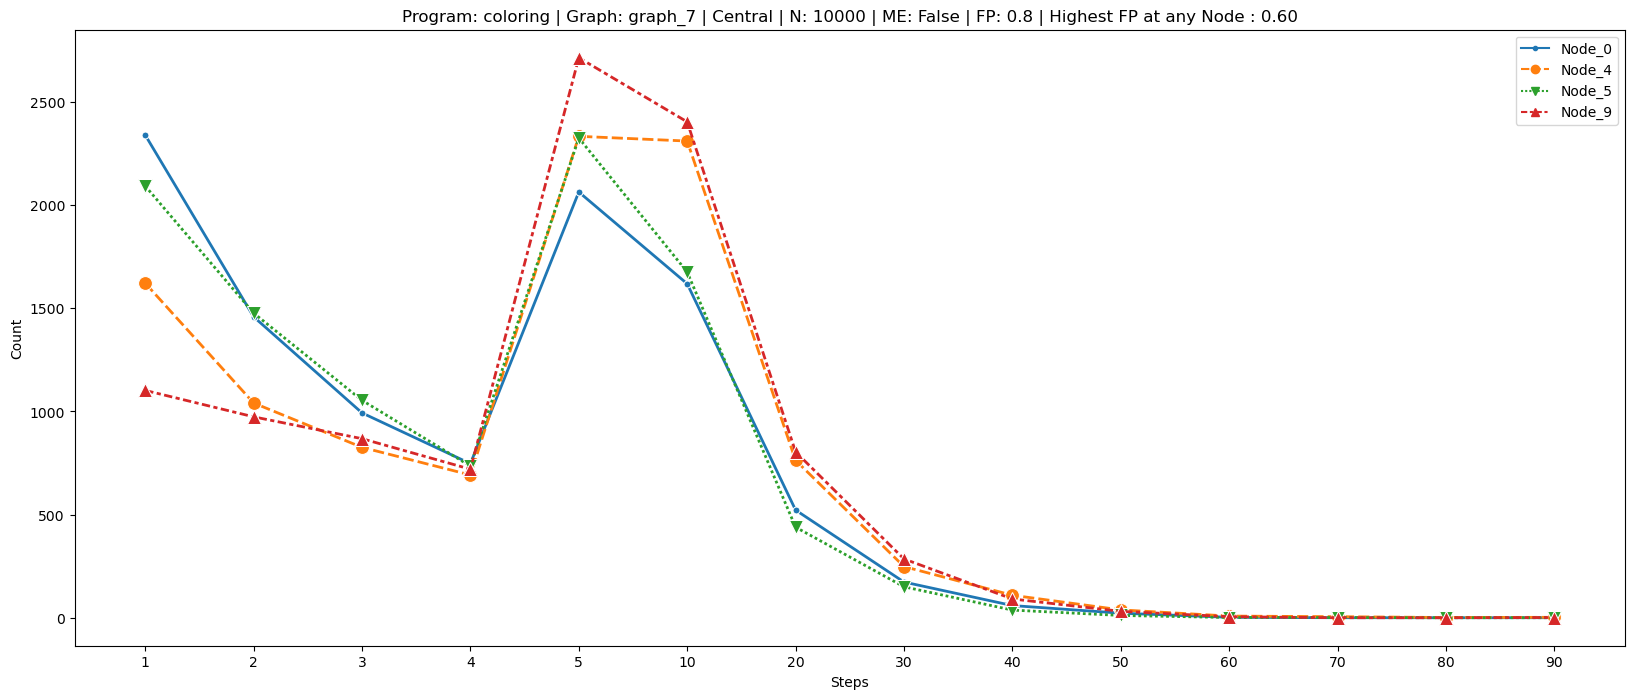

In [13]:
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Count")
plt.title(filename_parser(data_filename))
plt.show()
# plt.savefig(f"plots/{data_filename}.jpg", dpi=500)